## 03-Financial-Analysis-Pandas - Day 2 - Dataframe `indexing`, `cleaning`, `plotting`, `datetime` type

### Class Objectives
* Understand Pandas DataFrames and `Indexing`
* Access and manipulate data in a Pandas DataFrame using the index syntax of `iloc[]` and `loc[]`.
* Plotting DataFrame using `plot()`
* Understand the components of a Pandas `DateTime` object.
* Evaluating a statistical arbitrage opportunity for 2 correlated stocks.

### Resorces:
* [JupyterLab Overview](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)
* [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
* [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
* [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
* [Read & Write `methods` in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

# ================================

### 2.01 Instructor Do: Indexing (15 mins)

### Pandas DataFrames and Indexing

This program reads the loan information from a CSV file and creates a Pandas DataFrame. Use "indexing" to access the various data elements inside the Pandas DataFrame that is created. 


In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

### Read CSV in as DataFrame

In [2]:
# Set the path
file_path = Path('01_Inst_Indexing/Resources/loans.csv')

# Read in the CSV as a DataFrame
loans_csv = pd.read_csv(file_path)

### View the resulting DataFrame

In [3]:
# Review the resulting DataFrame
loans_csv

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
0,10000,10000,10000.0,36 months,0.1033,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-18,Current,n,debt_consolidation
1,4000,4000,4000.0,36 months,0.2340,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-18,Current,n,debt_consolidation
2,5000,5000,5000.0,36 months,0.1797,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,debt_consolidation
3,9600,9600,9600.0,36 months,0.1298,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-18,Current,n,home_improvement
4,2500,2500,2500.0,36 months,0.1356,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,debt_consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128407,23000,23000,23000.0,36 months,0.1502,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-18,Charged Off,n,debt_consolidation
128408,10000,10000,10000.0,36 months,0.1502,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-18,Current,n,debt_consolidation
128409,5000,5000,5000.0,36 months,0.1356,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-18,Current,n,debt_consolidation
128410,10000,10000,9750.0,36 months,0.1106,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-18,Current,n,credit_card


### View Summary Statistics

In [4]:
# "Describe" summary statistics for all of the csv data
loans_csv.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
count,128412.000000,128412.000000,128412.000000,128412,128412.000000,128412.000000,128412,128412,107465,116708,128412,1.284120e+05,128412,128412,128412,128412,128412
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,43892,11,4,NaN,3,3,7,1,12
top,NaN,NaN,NaN,36 months,NaN,NaN,A,A4,Teacher,10+ years,MORTGAGE,NaN,Not Verified,Oct-18,Current,n,debt_consolidation
freq,NaN,NaN,NaN,88179,NaN,NaN,38011,9770,2090,38826,63490,NaN,58350,46305,119540,128412,70603
mean,15971.321021,15971.321021,15968.498166,NaN,0.129302,463.259353,NaN,NaN,NaN,NaN,NaN,8.279733e+04,NaN,NaN,NaN,NaN,NaN
std,10150.384233,10150.384233,10152.168970,NaN,0.050904,285.718256,NaN,NaN,NaN,NaN,NaN,1.082985e+05,NaN,NaN,NaN,NaN,NaN
min,1000.000000,1000.000000,725.000000,NaN,0.060000,30.480000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,NaN,0.084600,253.630000,NaN,NaN,NaN,NaN,NaN,4.705800e+04,NaN,NaN,NaN,NaN,NaN
50%,14000.000000,14000.000000,14000.000000,NaN,0.118000,382.905000,NaN,NaN,NaN,NaN,NaN,6.800000e+04,NaN,NaN,NaN,NaN,NaN
75%,21600.000000,21600.000000,21600.000000,NaN,0.161400,622.680000,NaN,NaN,NaN,NaN,NaN,9.900000e+04,NaN,NaN,NaN,NaN,NaN


### Use iloc find the first 5 records.

In [5]:
# Retrieve rows with index 0 up to but not including 5.
loans_csv.iloc[0:5]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
0,10000,10000,10000.0,36 months,0.1033,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-18,Current,n,debt_consolidation
1,4000,4000,4000.0,36 months,0.2340,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-18,Current,n,debt_consolidation
2,5000,5000,5000.0,36 months,0.1797,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,debt_consolidation
3,9600,9600,9600.0,36 months,0.1298,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-18,Current,n,home_improvement
4,2500,2500,2500.0,36 months,0.1356,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,debt_consolidation


### Use iloc to find the 1st, 3rd, 5th, and 7th records

In [6]:
# Use iloc to find specific records
loans_csv.iloc[[0, 2, 4, 6]]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
0,10000,10000,10000.0,36 months,0.1033,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-18,Current,n,debt_consolidation
2,5000,5000,5000.0,36 months,0.1797,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,debt_consolidation
4,2500,2500,2500.0,36 months,0.1356,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,debt_consolidation
6,23000,23000,23000.0,60 months,0.2089,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-18,Current,n,debt_consolidation


### Filter Columns and Create Subset DataFrame

In [7]:
# Filter the DataFrame down to the following, keep all rows

#loan_amnt
#term
#int_rate
#purpose

filtered_df = loans_csv.iloc[:, [0, 3, 4, 16]]
filtered_df

,loan_amnt,term,int_rate,purpose
0,10000,36 months,0.1033,debt_consolidation
1,4000,36 months,0.2340,debt_consolidation
2,5000,36 months,0.1797,debt_consolidation
3,9600,36 months,0.1298,home_improvement
4,2500,36 months,0.1356,debt_consolidation
...,...,...,...,...
128407,23000,36 months,0.1502,debt_consolidation
128408,10000,36 months,0.1502,debt_consolidation
128409,5000,36 months,0.1356,debt_consolidation
128410,10000,36 months,0.1106,credit_card


### Use loc to filter the data where the loan_amount is less than or equal to 5000

In [8]:
# Create a new dataframe filtering down to only loan amounts less than
# or equal to 5000
small_loan_size_df = filtered_df.loc[filtered_df['loan_amnt'] <= 5000].copy()
small_loan_size_df.head()

,loan_amnt,term,int_rate,purpose
1,4000,36 months,0.2340,debt_consolidation
2,5000,36 months,0.1797,debt_consolidation
4,2500,36 months,0.1356,debt_consolidation
16,3500,36 months,0.2089,car
28,4000,36 months,0.1894,major_purchase


In [9]:
# Describe the summary statistics for all of the values. 
small_loan_size_df.describe(include='all')

,loan_amnt,term,int_rate,purpose
count,17723.000000,17723,17723.000000,17723
unique,NaN,1,NaN,12
top,NaN,36 months,NaN,debt_consolidation
freq,NaN,17723,NaN,6787
mean,3645.921966,NaN,0.135277,NaN
std,1298.956297,NaN,0.053713,NaN
min,1000.000000,NaN,0.060000,NaN
25%,2750.000000,NaN,0.088100,NaN
50%,4000.000000,NaN,0.127300,NaN
75%,5000.000000,NaN,0.169100,NaN


### Use loc to Modify Row Values

In [10]:
# Change row values within the 'term' column from '36 months' to '3 Years'
small_loan_size_df.loc[small_loan_size_df['term'] == '36 months', 'term'] = '3 Years'
small_loan_size_df.head()

,loan_amnt,term,int_rate,purpose
1,4000,3 Years,0.2340,debt_consolidation
2,5000,3 Years,0.1797,debt_consolidation
4,2500,3 Years,0.1356,debt_consolidation
16,3500,3 Years,0.2089,car
28,4000,3 Years,0.1894,major_purchase


### Show Unique Values for Loan Purpose for Small Loans

In [11]:
# Calculate unique values and counts for the purpose of the smaller 3 year customer loans
small_loan_size_df['purpose'].value_counts()

debt_consolidation    6787
credit_card           3880
other                 2790
home_improvement      1528
major_purchase         698
medical                649
vacation               478
car                    329
moving                 263
house                  154
small_business         148
renewable_energy        19
Name: purpose, dtype: int64

# ================================

### 2.02 Student Do: Indexing Loans (15 mins)

In this activity, you will access data from a Pandas DataFrame in order to analyze customers who are seeking three-year loans. Review the compilation of loan data, and then filter out the necessary data to generate insights about customers who have been granted three-year loans.

## Instructions

1. Using the Pandas `read_csv` function and the Path module, read in the `loans.csv` file from the `Resources` folder and create the Pandas DataFrame. Review the first five rows of the resulting DataFrame.

2. Using `iloc`, show the first 10 records of the data.

3. Generate the summary statistics for all of the `loans.csv` data.

4. Using `iloc`, create a subset DataFrame, `filtered_df`, by selecting only the following columns:

    * `loan_amnt`
    * `term`
    * `int_rate`
    * `emp_title`
    * `annual_inc`
    * `purpose`

5. Using `loc`, filter `filtered_df` by row values where `term` is equal to `36 months` in order to focus on only three-year loan records.

6. Modify rows with `term` values equal to `36 months` to be `3 years`.

7. Use the `isnull` and `sum` functions to evaluate the number of missing values in the `term_df` DataFrame. Use the `fillna` function to replace the NaN values with 'Unknown'. Review the first five rows of the new DataFrame.

8. Generate the summary statistics for `term_df` after all modifications.

9. Use the `value_counts` function on the `emp_title` column of the `term_df` DataFrame to view the unique value counts for employee titles of three-year loan customers.

10. Use the `value_counts` function on the `purpose` column of the `term_df` DataFrame to view the unique value counts for loan purposes of three-year loan customers.

11. Filter `term_df` by rows with `annual_inc` greater than `80000`. Use the `describe` function to view the mean `int_rate` of three-year loan customers with annual incomes greater than $80,000.

12. Filter `term_df` by rows with `annual_inc` less than `80000`. Use the `describe` function to view the average `int_rate` of three-year loan customers with annual incomes less than $80,000.

13. Answer the following questions about individuals taking out three-year loans:

    * What kind of customers (employee title) seem to ask for three-year loans most frequently?

    * What are three-year loans generally used for?

    * What is the difference between counts of three-year loan customers with annual incomes greater than 80,000, compared to those with annual incomes less than 80,000?

    * What is the difference between interest rates for customers with annual incomes greater than 80,000 compared to those with annual incomes less than 80,000?
    
## Hint

Refer to the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for additional explanations about using specific functions.

In [12]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

## Using the Pandas `read_csv` function and the Path module, read in in the `loans.csv` file and create the Pandas DataFrame. Review the first five rows of the resulting DataFrame.

In [13]:
# Read in the CSV as a DataFrame
csv_file = '02-Stu_Indexing_Loans/Resources/loans.csv'

# Review the first five rows of the DataFrame


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
0,10000,10000,10000.0,36 months,0.1033,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-18,Current,n,debt_consolidation
1,4000,4000,4000.0,36 months,0.2340,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-18,Current,n,debt_consolidation
2,5000,5000,5000.0,36 months,0.1797,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,debt_consolidation
3,9600,9600,9600.0,36 months,0.1298,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-18,Current,n,home_improvement
4,2500,2500,2500.0,36 months,0.1356,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,debt_consolidation


## Using the `iloc[]` function, show the first `10` records of the data.

In [14]:
# Retrieve rows with index 0 up to 10 (not including)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
0,10000,10000,10000.0,36 months,0.1033,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-18,Current,n,debt_consolidation
1,4000,4000,4000.0,36 months,0.2340,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-18,Current,n,debt_consolidation
2,5000,5000,5000.0,36 months,0.1797,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,debt_consolidation
3,9600,9600,9600.0,36 months,0.1298,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-18,Current,n,home_improvement
4,2500,2500,2500.0,36 months,0.1356,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,debt_consolidation
5,30000,30000,30000.0,60 months,0.1894,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,Current,n,debt_consolidation
6,23000,23000,23000.0,60 months,0.2089,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-18,Current,n,debt_consolidation
7,32075,32075,32075.0,60 months,0.1180,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-18,Current,n,credit_card
8,8000,8000,8000.0,36 months,0.2340,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-18,Current,n,debt_consolidation
9,10000,10000,10000.0,60 months,0.1992,264.50,D,D3,Material Handler,10+ years,MORTGAGE,80000.0,Not Verified,Dec-18,Current,n,debt_consolidation


## Generate the summary statistics for all of the `loans_df` DataFrame.

In [15]:
# Generate the summary statistics for the DataFrame
# Be sure to include all the columns


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose
count,128412.000000,128412.000000,128412.000000,128412,128412.000000,128412.000000,128412,128412,107465,116708,128412,1.284120e+05,128412,128412,128412,128412,128412
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,43892,11,4,NaN,3,3,7,1,12
top,NaN,NaN,NaN,36 months,NaN,NaN,A,A4,Teacher,10+ years,MORTGAGE,NaN,Not Verified,Oct-18,Current,n,debt_consolidation
freq,NaN,NaN,NaN,88179,NaN,NaN,38011,9770,2090,38826,63490,NaN,58350,46305,119540,128412,70603
mean,15971.321021,15971.321021,15968.498166,NaN,0.129302,463.259353,NaN,NaN,NaN,NaN,NaN,8.279733e+04,NaN,NaN,NaN,NaN,NaN
std,10150.384233,10150.384233,10152.168970,NaN,0.050904,285.718256,NaN,NaN,NaN,NaN,NaN,1.082985e+05,NaN,NaN,NaN,NaN,NaN
min,1000.000000,1000.000000,725.000000,NaN,0.060000,30.480000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,8000.000000,8000.000000,8000.000000,NaN,0.084600,253.630000,NaN,NaN,NaN,NaN,NaN,4.705800e+04,NaN,NaN,NaN,NaN,NaN
50%,14000.000000,14000.000000,14000.000000,NaN,0.118000,382.905000,NaN,NaN,NaN,NaN,NaN,6.800000e+04,NaN,NaN,NaN,NaN,NaN
75%,21600.000000,21600.000000,21600.000000,NaN,0.161400,622.680000,NaN,NaN,NaN,NaN,NaN,9.900000e+04,NaN,NaN,NaN,NaN,NaN


## Using `iloc[]`, create a subset DataFrame `filtered_df` by selecting only the following columns:

* `loan_amnt`
* `term`
* `int_rate`
* `emp_title`
* `annual_inc`
* `purpose`

In [16]:
# Using the `iloc` function, create a DataFrame that consists of all rows of the columns:
# loan_amnt, term, int_rate, emp_title, annual_inc and purpose


# Review the first five rows of the filtered DataFrame


,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,36 months,0.1033,NaN,280000.0,debt_consolidation
1,4000,36 months,0.2340,Security,90000.0,debt_consolidation
2,5000,36 months,0.1797,Administrative,59280.0,debt_consolidation
3,9600,36 months,0.1298,NaN,35704.0,home_improvement
4,2500,36 months,0.1356,Chef,55000.0,debt_consolidation


## Using `loc[]`, filter `filtered_df` by row values where `term` is equal to `36 months` in order to focus on only three-year loan records.

In [17]:
# Conditional indexing to filter DataFrame where 'term' is equal to '36 months'


# Review the first five rows of the term_df DataFrame


,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,36 months,0.1033,NaN,280000.0,debt_consolidation
1,4000,36 months,0.2340,Security,90000.0,debt_consolidation
2,5000,36 months,0.1797,Administrative,59280.0,debt_consolidation
3,9600,36 months,0.1298,NaN,35704.0,home_improvement
4,2500,36 months,0.1356,Chef,55000.0,debt_consolidation


## Modify rows with `term` values equal to `36 months` to be `3 years`.

In [18]:
# Change row values within the 'term' column from '36 months' to '3 Years'


# Review the first five rows of the term_df DataFrame


,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,3 Years,0.1033,NaN,280000.0,debt_consolidation
1,4000,3 Years,0.2340,Security,90000.0,debt_consolidation
2,5000,3 Years,0.1797,Administrative,59280.0,debt_consolidation
3,9600,3 Years,0.1298,NaN,35704.0,home_improvement
4,2500,3 Years,0.1356,Chef,55000.0,debt_consolidation


## Use the `isnull` and `sum` function to evaluate the number of missing values in the `term_df` DataFrame. Use the `fillna` function to replace the NaN values with 'Unknown'. Review the first five rows of the new DataFrame 

In [19]:
# Use the isnaull and sum functions to evaluate the number of missing values in the `term_df` DataFrame.


loan_amnt         0
term              0
int_rate          0
emp_title     15669
annual_inc        0
purpose           0
dtype: int64

In [20]:
#  Use the `fillna` function to replace the NaN values with 'Unknown'


# Review the first five rows of the cleaned term_df DataFrame


,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,3 Years,0.1033,Unknown,280000.0,debt_consolidation
1,4000,3 Years,0.2340,Security,90000.0,debt_consolidation
2,5000,3 Years,0.1797,Administrative,59280.0,debt_consolidation
3,9600,3 Years,0.1298,Unknown,35704.0,home_improvement
4,2500,3 Years,0.1356,Chef,55000.0,debt_consolidation


### Generate the summary statistics for `term_df` after all modifications.

In [21]:
# Describe summary statistics for three-year loans


,loan_amnt,int_rate,annual_inc
count,88179.000000,88179.000000,8.817900e+04
mean,13279.580456,0.120610,8.043616e+04
std,9479.610905,0.048955,1.109251e+05
min,1000.000000,0.060000,0.000000e+00
25%,6000.000000,0.078400,4.500000e+04
50%,10000.000000,0.110600,6.500000e+04
75%,18000.000000,0.150200,9.500000e+04
max,40000.000000,0.309900,9.000000e+06


## Use the `value_counts()` function on the `emp_title` column of the `term_df` DataFrame to see the unique value counts for employee titles of three-year loan customers.

In [22]:
# Calculate unique values and counts for employee titles of 3 year customer loans


Unknown                           15669
Teacher                            1433
Manager                            1207
Registered Nurse                    672
Driver                              654
                                  ...  
PROGRAM APPLICATION SPECIALIST        1
Clinical Site Manager                 1
Supply analyst                        1
Quality Control Rep                   1
Human Service Counselor III           1
Name: emp_title, Length: 31470, dtype: int64

## Use the `value_counts()` function on the `purpose` column of the `term_df` DataFrame to see the unique value counts for loan purposes of three-year loan customers.

In [23]:
# Calculate unique values and counts for loan purposes of 3 year customer loans


debt_consolidation    45456
credit_card           24780
other                  5836
home_improvement       5446
major_purchase         1795
medical                1245
car                     838
small_business          828
vacation                749
house                   596
moving                  547
renewable_energy         63
Name: purpose, dtype: int64

## Filter `term_df` by rows with `annual_inc` greater than `80000`. Use the `describe` function to see the mean `int_rate` of three-year loan customers with annual incomes greater than $80,000.

In [24]:
# Display summary statistics where annual income is greater than $80,000 to find count and mean


,loan_amnt,int_rate,annual_inc
count,29748.000000,29748.000000,2.974800e+04
mean,18240.116142,0.114116,1.389634e+05
std,10991.909117,0.048067,1.752361e+05
min,1000.000000,0.060000,8.000100e+04
25%,10000.000000,0.075600,9.500000e+04
50%,15700.000000,0.104700,1.120000e+05
75%,25000.000000,0.144700,1.500000e+05
max,40000.000000,0.309400,9.000000e+06


## Filter `term_df` by rows with `annual_inc` less than `80000`. Use the `describe` function to see the average `int_rate` of three-year loan customers with annual incomes less than $80,000.

In [25]:
# Display summary statistics where annual income is less than $80,000 to find count and mean


,loan_amnt,int_rate,annual_inc
count,56015.000000,56015.000000,56015.000000
mean,10607.487727,0.124268,49372.805964
std,7318.791900,0.049137,16669.098821
min,1000.000000,0.060000,0.000000
25%,5000.000000,0.081900,37000.000000
50%,9600.000000,0.113100,50000.000000
75%,14000.000000,0.150200,62635.500000
max,40000.000000,0.309900,79999.000000


## Answer the following questions about individuals taking out 3 year loans:

1. What kind of customers (employee title) seem to ask for three-year loans most frequently?
2. What are three-year loans generally used for?
3. What is the difference in count of three-year loan customers with annual incomes greater than 80,000 compared to those with annual incomes less than 80,000?
4. What is the difference in interest rates of three-year loan customers with annual incomes greater than 80,000 compared to those with annual incomes less than 80,000? 

# YOUR ANSWERS HERE

# ================================

### 2.03 Instructor Do: Pandas DateTime Object (15 mins)

In this activity we will explore the Pandas DataTime object using historical data from the Philidelphia SemiConductor Index (SOX)

In [26]:
# Import required libraries

import pandas as pd
from pathlib import Path

### Pandas to_datetime() Function

In [27]:
# Find the information for `today`
pd.to_datetime('today')

Timestamp('2021-01-14 13:27:15.676574')

### Read in CSV file and create DataFrame

In [28]:
# Read in the CSV as a DataFrame
sox_df = pd.read_csv(Path('03-Inst_Pandas_DateTime_Object/Resources/SOX_2015_2020.csv'))

# Display the fist and last five rows of the DataFrame
display(sox_df.head())
display(sox_df.tail())

# View the DataFrame information
sox_df.info()


,Date,Open,High,Low,Close
0,2015-05-26 09:30:00,719.51,720.32,714.11,714.70
1,2015-05-26 10:00:00,714.70,715.58,712.02,713.89
2,2015-05-26 12:00:00,713.89,714.56,711.89,711.95
3,2015-05-26 14:00:00,711.95,715.43,711.44,714.79
4,2015-05-27 09:30:00,716.49,723.03,716.21,721.83


,Date,Open,High,Low,Close
4952,2020-05-12 14:00:00,1773.22,1774.03,1724.40,1724.59
4953,2020-05-13 09:30:00,1729.62,1733.20,1708.62,1721.73
4954,2020-05-13 10:00:00,1721.50,1741.61,1689.48,1693.28
4955,2020-05-13 12:00:00,1693.33,1695.57,1674.23,1676.15
4956,2020-05-13 14:00:00,1675.86,1694.44,1667.52,1691.58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4957 non-null   object 
 1   Open    4957 non-null   float64
 2   High    4957 non-null   float64
 3   Low     4957 non-null   float64
 4   Close   4957 non-null   float64
dtypes: float64(4), object(1)
memory usage: 193.8+ KB


## Reimport the CSV file creating a DateTime Index from the "Date" column

In [29]:
# Read in the CSV as a DataFrame and convert the "Date" column to a DataTime Index
sox_df = pd.read_csv(
    Path('03-Inst_Pandas_DateTime_Object/Resources/SOX_2015_2020.csv'), 
    index_col="Date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Display the fist and last five rows of the DataFrame
display(sox_df.head())
display(sox_df.tail())

# View the DataFrame information
sox_df.info()

,Open,High,Low,Close
Date,,,,
2015-05-26 09:30:00,719.51,720.32,714.11,714.70
2015-05-26 10:00:00,714.70,715.58,712.02,713.89
2015-05-26 12:00:00,713.89,714.56,711.89,711.95
2015-05-26 14:00:00,711.95,715.43,711.44,714.79
2015-05-27 09:30:00,716.49,723.03,716.21,721.83


,Open,High,Low,Close
Date,,,,
2020-05-12 14:00:00,1773.22,1774.03,1724.40,1724.59
2020-05-13 09:30:00,1729.62,1733.20,1708.62,1721.73
2020-05-13 10:00:00,1721.50,1741.61,1689.48,1693.28
2020-05-13 12:00:00,1693.33,1695.57,1674.23,1676.15
2020-05-13 14:00:00,1675.86,1694.44,1667.52,1691.58


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4957 entries, 2015-05-26 09:30:00 to 2020-05-13 14:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4957 non-null   float64
 1   High    4957 non-null   float64
 2   Low     4957 non-null   float64
 3   Close   4957 non-null   float64
dtypes: float64(4)
memory usage: 193.6 KB


### Plot the SOX DataFrame with Date as the index

<AxesSubplot:xlabel='Date'>

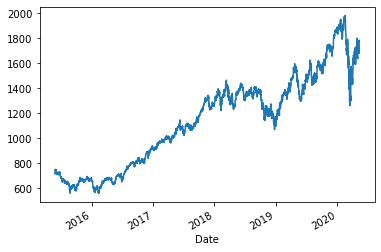

In [30]:
# Plot the closing price for the SOX DataFrame
sox_df['Close'].plot()

<AxesSubplot:xlabel='Date'>

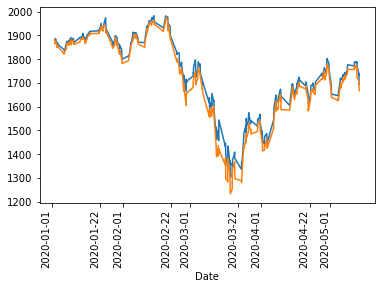

In [31]:
# Plot the high and low price for a specific date range
sox_df['High'].loc['2020-01-01':'2020-05-13'].plot(rot=90)
sox_df['Low'].loc['2020-01-01':'2020-05-13'].plot(rot=90)

<AxesSubplot:xlabel='Date'>

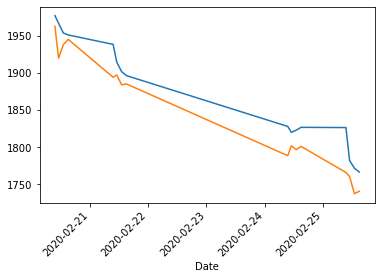

In [32]:
# Plot a specific time period
sox_df['High'].loc['2020-02-20 09:30:00':'2020-02-25 16:00:00'].plot(rot=45)
sox_df['Low'].loc['2020-02-20 09:30:00':'2020-02-25 16:00:00'].plot(rot=45)

In [33]:
# Create a DataFrame from the specified time period
sox_close_week = sox_df['Close'].loc['2020-02-20 09:30:00':'2020-02-25 16:00:00']

# View the first and last five rows of the resulting DataFrame
display(sox_close_week.head())
display(sox_close_week.tail())

Date
2020-02-20 09:30:00    1966.92
2020-02-20 11:00:00    1940.75
2020-02-20 13:00:00    1950.67
2020-02-20 15:00:00    1949.28
2020-02-21 09:30:00    1907.34
Name: Close, dtype: float64

Date
2020-02-24 15:00:00    1801.21
2020-02-25 09:30:00    1778.55
2020-02-25 11:00:00    1766.41
2020-02-25 13:00:00    1756.35
2020-02-25 15:00:00    1746.08
Name: Close, dtype: float64

In [34]:
# Calculating percent change using the opening and closing values for the week
sox_open = sox_close_week.loc['2020-02-20 09:30:00']
sox_close = sox_close_week.loc['2020-02-25 15:00:00']

display(sox_open)
display(sox_close)

percent_change = (sox_close - sox_open) / sox_open

display(percent_change)

1966.92

1746.08

-0.11227706261566314

# ================================

### 2.04 Student Do: Markets and DateTime (20 mins)

In this activity, you will analyze a CSV file that contains pricing data from a single week in February 2020 for various stocks and indexes. You will use the `loc` function and the Pandas DateTime functionality in order to determine the percent change in the price for one day of the week and for the week as a whole.

## Instructions

1. Using the Pandas `read_csv` function and the Path module, read `market_data.csv` into a Pandas DataFrame. Review the first five rows of the Dataframe. Then use the `info` function to determine the columns and their respective data types.

2. Re-import `market_data.csv` using the `read_csv` function. This time, set the `index_col` to "Timestamp", and set the `parse_dates` and `infer_datetime_format` parameters. Display the first five rows of the Dataframe. Then use the `info` function to determine the columns and their respective data types.

3. Using the `plot` function, plot the pricing information for the ticker of your choosing from the DataFrame. This will display the data for the full week's worth of information for the chosen stock.

    **Hint:** You will notice that the data is very choppy. This is because the data contains information for times when the markets were not open and the stock or index was not trading.

4. Using the same stock from Step 3, choose the day with the biggest pricing change and plot just that single day. You will need to use the `loc` function and reference your chosen date in the format displayed in the TimeStamp index. You will not reference the time in this step.

5. For your chosen stock, plot the active trading period. To do this, use the `loc` function, reference the date used in Step 4, and add the time component. The trading day for these stocks will be from approximately 09:30 to 16:00.

Next, complete the following steps to calculate the percent change in the stock/index for your chosen day of the week.

6. Create a Pandas DataFrame that includes data for your chosen stocks trading day. To create the DataFrame, use the code from the previous step and remove the `plot` function. This should display the exact times that the stock/index started and finished trading. Confirm the creation of your DataFrame by displaying the first and last five rows.

7. Create a variable called `day_open` that holds the opening price for your stock or index. Set this variable equal to the opening price using the `loc` function, and reference the date and exact time that trading began. View the value of this variable.

8. Create a variable called `day_close` that holds the closing price for your stock or index. Set this variable equal to the closing price using the `loc` function, and reference the date and exact time that trading ended. View the value of this variable.

9.  Calculate and display the percent change (`day_percent_change`) variable using the following formula: (day_close- day_open) / day_open

Next, complete the following steps to calculate the percent change in the stock/index for the week.

10. Create a Pandas DataFrame that includes the week's worth of trading data for your chosen stock. Use the `loc` function and specify the time from 09:30:00 on 2020-02-24 through 16:00:00 on 2020-02-28. Confirm the creation of your DataFrame by displaying the first and last five rows.

11. Create a variable called `week_open` that holds the week's opening price for your stock or index. Set this variable equal to the opening price using the `loc` function, and reference the date and exact time that trading began on the first day of the week. Display this variable.

12. Create a variable called `week_close` that holds the week's closing price for your stock or index. Set this variable equal to the closing price using the `loc` function, and reference the date and exact time that trading closed on the last day of the week. Display this variable.

13.  Calculate and display the percent change (`week_percent_change`) variable using the following formula: (week_close - week_open) / week_open

In [35]:
# Import required libraries

import pandas as pd
from pathlib import Path

## Using the Pandas `read_csv` function and the Path module, read in the "market_data.csv" file and examine the DataFrame. Display the first five rows of the Dataframe. Utilize the `info()` function to determine the columns and their respective data-types.

In [36]:
# Using the Pandas `read_csv` function and the Path module, read in the "Market_Data.csv" file and examine the DataFrame. 
csv_file = '04-Stu_Markets_and_DateTime/Resources/market_data.csv'

# Display the first five rows of the Dataframe


# Utilize the `info()` function to determine the columns and their respective data-types


,TimeStamp,SPY,QQQ,IWM,AAPL,MSFT,NVDA,XLK,XLF,XLP,XLY,XTN,HYG,TLT
0,2020-02-23 17:59:02.000,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
1,2020-02-23 17:59:05.000,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
2,2020-02-23 17:59:08.000,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
3,2020-02-23 17:59:11.000,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
4,2020-02-23 17:59:14.000,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128367 entries, 0 to 128366
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TimeStamp  128367 non-null  object 
 1   SPY        128367 non-null  float64
 2   QQQ        128367 non-null  float64
 3   IWM        128367 non-null  float64
 4   AAPL       128367 non-null  float64
 5   MSFT       128367 non-null  float64
 6   NVDA       128367 non-null  float64
 7   XLK        128367 non-null  float64
 8   XLF        128367 non-null  float64
 9   XLP        128367 non-null  float64
 10  XLY        128367 non-null  float64
 11  XTN        128367 non-null  float64
 12  HYG        128367 non-null  float64
 13  TLT        128367 non-null  float64
dtypes: float64(13), object(1)
memory usage: 13.7+ MB


## Reimport the "market_data.csv" file using the Pandas read_csv function, but this time set the `index_col` to "Timestamp", and set the `parse_dates` and `infer_datetime_format` parameters. Display the first five rows of the Dataframe. Utilize the `info()` function to determine the columns and their respective data-types.

In [37]:
# Using the Pandas `read_csv` function and the Path module, read in the "Market_Data.csv" file and examine the DataFrame. 


# Display the first five rows of the Dataframe


# Utilize the `info()` function to determine the columns and their respective data-types


,SPY,QQQ,IWM,AAPL,MSFT,NVDA,XLK,XLF,XLP,XLY,XTN,HYG,TLT
TimeStamp,,,,,,,,,,,,,
2020-02-23 17:59:02,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
2020-02-23 17:59:05,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
2020-02-23 17:59:08,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
2020-02-23 17:59:11,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04
2020-02-23 17:59:14,333.48,230.27,167.1,313.05,178.59,294.07,99.44,30.77,64.65,130.3,66.5047,88.33,148.04


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128367 entries, 2020-02-23 17:59:02 to 2020-02-28 17:40:57
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SPY     128367 non-null  float64
 1   QQQ     128367 non-null  float64
 2   IWM     128367 non-null  float64
 3   AAPL    128367 non-null  float64
 4   MSFT    128367 non-null  float64
 5   NVDA    128367 non-null  float64
 6   XLK     128367 non-null  float64
 7   XLF     128367 non-null  float64
 8   XLP     128367 non-null  float64
 9   XLY     128367 non-null  float64
 10  XTN     128367 non-null  float64
 11  HYG     128367 non-null  float64
 12  TLT     128367 non-null  float64
dtypes: float64(13)
memory usage: 13.7 MB


### Plot the pricing information for your choosen stock or index

<AxesSubplot:xlabel='TimeStamp'>

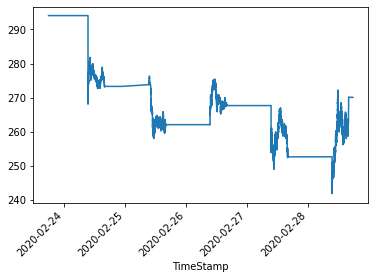

In [38]:
# Choose a stock or index and plot the data for the week's pricing information


## Using the same stock from step 3, choose the day with the biggest pricing change and plot just that single day. You will need to utilize the `loc[]` function and reference your chosen date in the format displayed in the TimeStamp index. You will not reference the time in this step.

<AxesSubplot:xlabel='TimeStamp'>

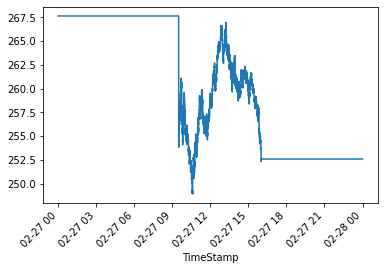

In [39]:
# Using loc[], plot the stock or index for the day with the biggest pricing change


## For your chosen stock, plot the active trading period. To do this, utilize the `loc[]` function, reference the date used in step 6 and add the time component. The trading day for these stocks will be from approximately 09:30 to 16:00.

<AxesSubplot:xlabel='TimeStamp'>

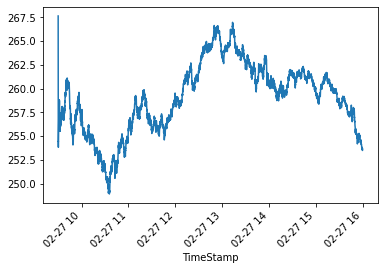

In [40]:
# Using loc[], plot your stock or index for the active trading hours of your chosen day (ie: time 09:30 and 16:00)


## In the following steps you are going to calculate the percent change in the stock/index for your chosen day of the week.

## Create a Pandas DataFrame that includes data for your chosen stocks trading day. To create the DataFrame, use the code from the previous step and remove the `plot()` function. The should display the exact times that the stock/index started and finished trading. Confirm the creation of your DataFrame by displaying the first and last five rows.

In [41]:
# View the DataFrame for your chosen day to determine the exact opening and closing times.


# Display the first and last five rows of the resulting DataFrame



TimeStamp
2020-02-27 09:30:00    267.65
2020-02-27 09:30:03    254.84
2020-02-27 09:30:06    254.90
2020-02-27 09:30:09    254.78
2020-02-27 09:30:12    254.06
Name: NVDA, dtype: float64

TimeStamp
2020-02-27 15:59:46    253.61
2020-02-27 15:59:49    253.69
2020-02-27 15:59:52    253.50
2020-02-27 15:59:55    253.59
2020-02-27 15:59:58    253.65
Name: NVDA, dtype: float64

## Create a variable called `day_open` that holds the opening price for your stock or index. Set this variable equal to the opening price using the `loc[]` function and reference the date and exact time that trading began. View the value of this variable.

In [42]:
# Crate a variable day_open to hold the opening price (approximately 09:30:00) for the week


# View the day_close value


267.65

## Create a variable called `day_close` that holds the closing price for your stock or index. Set this variable equal to the closing price using the `loc[]` function and reference the date and exact time that trading ended. View the value of this variable.

In [43]:
# Crate a variable (ie day_close_spy) to hold the closing (approximately 16:00:00) price for the chosen day


# View the day_close value


253.65

## Calculate and display the percent change (day_percent_change) variable using the formula `(day_close- day_open) / day_open`

In [44]:
# Using the variables, calculate the percent change in the price for the trading day (close-open/open)


# View the percent change of your stock on the day chosen


-0.05230711750420315

## In the following steps you are going to calculate the percent change in the stock/index for the week.

## Create a Pandas DataFrame that includes the weeks worth of trading data for your chosen stock. Use the `loc` function and specify the time from 09:30:00 on 2020-02-24 through 16:00:00 on 202-02-28. Confirm the creation of your DataFrame by displaying the first and last five rows of the DataFrame.

In [45]:
# Create a Pandas DataFrame that includes the weeks worth of trading data for your chosen stock. 
# Use the `loc` function and specify the time from 2020-02-24 09:30:00 through 2020-02-28 16:00:00.


# Display the first and last five rows of your DataFrame



TimeStamp
2020-02-24 09:30:02    294.07
2020-02-24 09:30:05    271.47
2020-02-24 09:30:08    270.39
2020-02-24 09:30:11    269.76
2020-02-24 09:30:14    269.97
Name: NVDA, dtype: float64

TimeStamp
2020-02-28 15:59:48    267.5500
2020-02-28 15:59:51    267.5500
2020-02-28 15:59:54    267.9332
2020-02-28 15:59:57    267.9332
2020-02-28 16:00:00    267.9900
Name: NVDA, dtype: float64

## Create a variable `week_open` that holds the week's opening price for your stock or index. Set this variable equal to the opening price using the `loc[]` function and reference the date and exact time that trading began on the first day of the week. Display this variable.

In [46]:
# Set the opening price for the week to a variable called week_open.


# View the value of week_open


294.07

## Create a variable `week_close` that holds the week's closing price for your stock or index. Set this variable equal to the closing price using the `loc[]` function and reference the date and exact time that trading closed on the last day of the week. Display this variable.

In [47]:
# Set the closing price for the week to a variable called week_close.


# View the value of week_close


267.99

## Calculate and display the percent change (week_percent_change) variable using the formula `(week_close - week_open) / week_open`

In [48]:
# Using the variables, calculate the percent change in the price for the trading week (close-open/open)


# View the value of the week_percent_change


-0.08868636719148497

# ================================

### 2.05 Instructor Do: Arbitrage in Code (10 mins)

# Arbitrage

In this demonstration, we will be evaluating a statistical arbitrage opportunity for 2 correlated stocks, Coca-Cola (KO) and Pepsi (PEP).

In [49]:
# Import required libraries

import pandas as pd
from pathlib import Path

### Read in the CSV files and examine the DataFrames for both  Coca-Cola (KO) and Pepsi (PEP)

In [50]:
# For KO: Set the path, read in the CSV file using Pandas and review the DataFrame.
file_path = Path('05-Inst_Arbitrage_in_Code/Resources/KO.csv')

# Read in the CSV as a DataFrame
KO_csv = pd.read_csv(file_path)
KO_csv.info()
KO_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67028 entries, 0 to 67027
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  67028 non-null  object 
 1   open      67028 non-null  float64
 2   high      67028 non-null  float64
 3   low       67028 non-null  float64
 4   close     67028 non-null  float64
 5   volume    67028 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ MB


,DateTime,open,high,low,close,volume
0,2017-01-03 09:30:00-05:00,41.495,41.600,41.475,41.540,15369
1,2017-01-03 09:35:00-05:00,41.530,41.530,41.370,41.380,4129
2,2017-01-03 09:40:00-05:00,41.370,41.390,41.310,41.320,7095
3,2017-01-03 09:45:00-05:00,41.320,41.400,41.320,41.330,8577
4,2017-01-03 09:50:00-05:00,41.340,41.370,41.285,41.370,6836
...,...,...,...,...,...,...
67023,2020-07-31 15:35:00-04:00,46.965,47.015,46.960,46.965,39912
67024,2020-07-31 15:40:00-04:00,46.965,47.005,46.945,46.990,29988
67025,2020-07-31 15:45:00-04:00,47.000,47.125,47.000,47.120,94006
67026,2020-07-31 15:50:00-04:00,47.120,47.140,47.045,47.090,86888


In [51]:
# For PEP: Set the path, read in the CSV file using Pandas and review the DataFrame.
file_path = Path('05-Inst_Arbitrage_in_Code/Resources/PEP.csv')

# Read in the CSV as a DataFrame
PEP_csv = pd.read_csv(file_path)
PEP_csv.info()
PEP_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68802 entries, 0 to 68801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  68802 non-null  object 
 1   open      68802 non-null  float64
 2   high      68802 non-null  float64
 3   low       68802 non-null  float64
 4   close     68802 non-null  float64
 5   volume    68802 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ MB


,DateTime,open,high,low,close,volume
0,2017-01-03 09:30:00-05:00,104.94,104.95,104.73,104.84,2413
1,2017-01-03 09:35:00-05:00,104.71,104.86,104.60,104.60,500
2,2017-01-03 09:40:00-05:00,104.61,104.61,104.50,104.51,816
3,2017-01-03 09:45:00-05:00,104.56,104.56,104.48,104.48,300
4,2017-01-03 09:50:00-05:00,104.47,104.65,104.47,104.62,1321
...,...,...,...,...,...,...
68797,2020-07-31 15:35:00-04:00,136.77,136.87,136.77,136.85,2676
68798,2020-07-31 15:40:00-04:00,136.78,136.90,136.74,136.90,2956
68799,2020-07-31 15:45:00-04:00,137.12,137.16,136.96,137.16,2585
68800,2020-07-31 15:50:00-04:00,137.19,137.40,137.04,137.33,10280


### Convert the DateTime column from Pandas object to DateTime series & set as the Index

In [52]:
KO_csv['DateTime'] = pd.to_datetime(KO_csv['DateTime'], infer_datetime_format=True, utc=True)
KO_csv['DateTime'] = KO_csv['DateTime'].dt.tz_convert('US/Eastern')
KO_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67028 entries, 0 to 67027
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                     
---  ------    --------------  -----                     
 0   DateTime  67028 non-null  datetime64[ns, US/Eastern]
 1   open      67028 non-null  float64                   
 2   high      67028 non-null  float64                   
 3   low       67028 non-null  float64                   
 4   close     67028 non-null  float64                   
 5   volume    67028 non-null  int64                     
dtypes: datetime64[ns, US/Eastern](1), float64(4), int64(1)
memory usage: 3.1 MB


In [53]:
KO_csv = KO_csv.set_index(KO_csv['DateTime']).drop(columns=['DateTime'])
KO_csv

,open,high,low,close,volume
DateTime,,,,,
2017-01-03 09:30:00-05:00,41.495,41.600,41.475,41.540,15369
2017-01-03 09:35:00-05:00,41.530,41.530,41.370,41.380,4129
2017-01-03 09:40:00-05:00,41.370,41.390,41.310,41.320,7095
2017-01-03 09:45:00-05:00,41.320,41.400,41.320,41.330,8577
2017-01-03 09:50:00-05:00,41.340,41.370,41.285,41.370,6836
...,...,...,...,...,...
2020-07-31 15:35:00-04:00,46.965,47.015,46.960,46.965,39912
2020-07-31 15:40:00-04:00,46.965,47.005,46.945,46.990,29988
2020-07-31 15:45:00-04:00,47.000,47.125,47.000,47.120,94006


In [54]:
PEP_csv['DateTime'] = pd.to_datetime(PEP_csv['DateTime'], infer_datetime_format=True, utc=True)
PEP_csv['DateTime'] = PEP_csv['DateTime'].dt.tz_convert('US/Eastern')
PEP_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68802 entries, 0 to 68801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                     
---  ------    --------------  -----                     
 0   DateTime  68802 non-null  datetime64[ns, US/Eastern]
 1   open      68802 non-null  float64                   
 2   high      68802 non-null  float64                   
 3   low       68802 non-null  float64                   
 4   close     68802 non-null  float64                   
 5   volume    68802 non-null  int64                     
dtypes: datetime64[ns, US/Eastern](1), float64(4), int64(1)
memory usage: 3.1 MB


In [55]:
PEP_csv = PEP_csv.set_index(PEP_csv['DateTime']).drop(columns=['DateTime'])
PEP_csv.info()
PEP_csv

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68802 entries, 2017-01-03 09:30:00-05:00 to 2020-07-31 15:55:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    68802 non-null  float64
 1   high    68802 non-null  float64
 2   low     68802 non-null  float64
 3   close   68802 non-null  float64
 4   volume  68802 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.1 MB


,open,high,low,close,volume
DateTime,,,,,
2017-01-03 09:30:00-05:00,104.94,104.95,104.73,104.84,2413
2017-01-03 09:35:00-05:00,104.71,104.86,104.60,104.60,500
2017-01-03 09:40:00-05:00,104.61,104.61,104.50,104.51,816
2017-01-03 09:45:00-05:00,104.56,104.56,104.48,104.48,300
2017-01-03 09:50:00-05:00,104.47,104.65,104.47,104.62,1321
...,...,...,...,...,...
2020-07-31 15:35:00-04:00,136.77,136.87,136.77,136.85,2676
2020-07-31 15:40:00-04:00,136.78,136.90,136.74,136.90,2956
2020-07-31 15:45:00-04:00,137.12,137.16,136.96,137.16,2585


### Plotting KO and PEP

<AxesSubplot:xlabel='DateTime'>

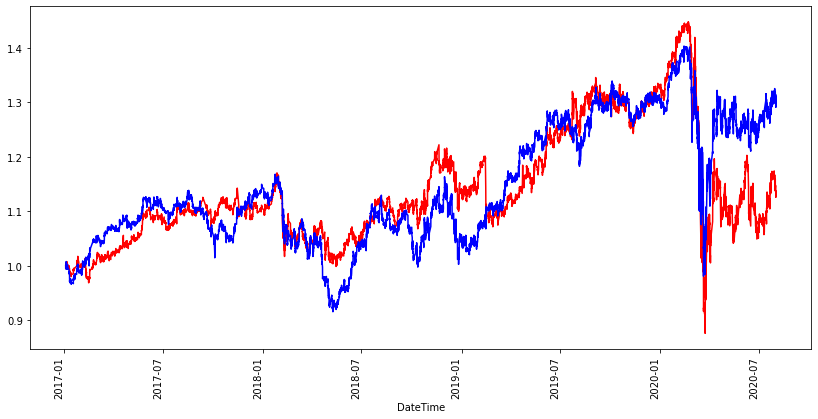

In [56]:
# Normalizing both KO & PEP so the first date starts at a price of 1, plot both dataframes
normalize_KO = KO_csv['close']/KO_csv['close'].iloc[0]
normalize_PEP = PEP_csv['close']/PEP_csv['close'].iloc[0]
normalize_KO.plot(figsize=(14,7), rot=90, color="red")
normalize_PEP.plot(figsize=(14,7), rot=90, color="blue")

Per the graph, KO and PEP appear to, for the most part, move in tandem with a consistent spread. At the surface, it also appears that PEP is the more volatile of the 2 stocks. It appears that there are periods where PEP takes a big dip, but eventually works its way back into line.

This illustrates the concept of **reversion to the mean**, and it underlies a possible statistical arbitrage opportunity. Buying PEP after a big down move might indicate a buying opportunity. The purchase of PEP is offset with a short-sale of KO to keep the position market-neutral with the intention of minimizing market risk. 

### KO vs PEP for 2018 - A closer look

<AxesSubplot:xlabel='DateTime'>

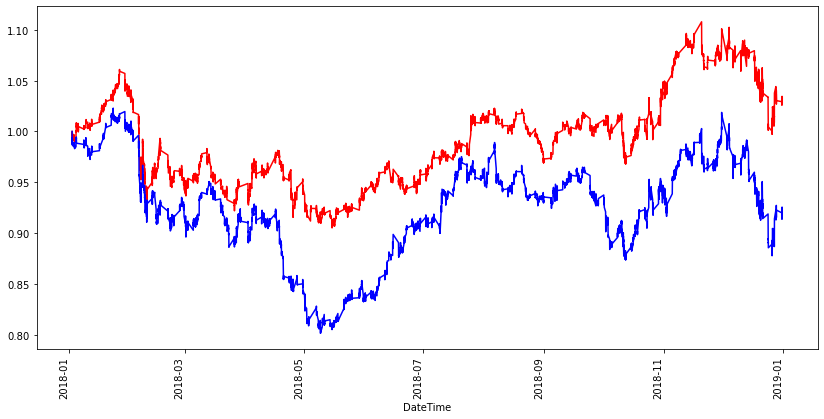

In [57]:
# Plotting 2018, again normaling both dataframes
normalize_KO_2018 = KO_csv['close'].loc['2018-01-01':'2018-12-31']/KO_csv['close'].loc['2018-01-02 09:30:00-05:00']
normalize_PEP_2018 = PEP_csv['close'].loc['2018-01-01':'2018-12-31']/PEP_csv['close'].loc['2018-01-02 09:30:00-05:00']
normalize_KO_2018.plot(figsize=(14,7), rot=90, color="red")
normalize_PEP_2018.plot(figsize=(14,7), rot=90, color="blue")

Honing in on just 2018, the trend seems to hold. When PEP dips and the realative spread between the two narrows, PEP seems to outperform.

A firm that plays in statistical arbitrage would establish very quantative criteria around this trend and then execute their pairs trade, that is, buy Pepsi and sell short an equivalent dollar amount of KO. These positions would be held for a very short amount of time, a few hours to a few days. The unwind would likely be triggered by another quantatively-based signal. 

### Gain/Loss Calculation Example

### PEP Purchase

Below we will calculate the resulting gain or loss from purchasing 1 share of PEP at the open on 6/20 and selling it at the close on 6/22. The gain/loss is calculated by subtracting the money paid out on the purchase from the money received on the sale. 

In [58]:
# PEP purchase

pch_PEP = PEP_csv['close'].loc['2018-06-20 09:30:00']
sale_PEP = PEP_csv['close'].loc['2018-06-22 15:55:00']

gainloss_PEP = sale_PEP - pch_PEP
gainloss_PEP

2.6799999999999926

### KO Short-sale

KO is being sold short to reduce market exposure. In our calculation, we will sell 2.5 shares of KO (the cost of 1 share of PEP is 2.5 times that of KO) to keep the dollar-exposure neutral as well. Calculating the gain loss will involve subtracting the money paid out on the purchase to cover our short sale from the money received from the short sale of KO.

In [59]:
# KO short sale - 2 shares sold short to keep it dollar-neutral

short_sale_KO = KO_csv['close'].loc['2018-06-20 09:30:00']
cover_pch_KO = KO_csv['close'].loc['2018-06-22 15:55:00']

gainloss_KO = 2.5 * (short_sale_KO - cover_pch_KO)
gainloss_KO

1.0125000000000028

In this case, the stat-arb trader would have gotten lucky. Money was made on both sides of the trade as the price of PEP increased, which made money on the long positon, while the price of KO decreased to yield a gain on the short position. 

In the real world, this trade would have been considerably larger, with much more quantative analysis coming into play. 

In [60]:
# Calculate net gain/loss

net_gainloss = gainloss_PEP + gainloss_KO
net_gainloss

3.6924999999999955

## Conslusion

Overall, arbitrage seeks to take advantage of a short-term price dislocation between identical or correlated assets. 

FinTech firms and their sophisticated algorithmic models now scour world-wide markets searching out arbitrage opportunities. These same computer programs are also largely responsible for the trade execution.  

It is a dynamic and exciting area at the intersection of FinTech and trading. 

# ================================

### 2.06 Instructor Do: Data Cleaning (10 min)

This program goes reads in a CSV file, and perfoms a number of data quality checks. Data values that fail the checks are then cleansed.

In [61]:
# Initial imports
import pandas as pd
from pathlib import Path

### Read in CSV and take a sample

In [62]:
# Take sample of data
csv_path = Path("06-Ins_Data_Cleaning/Resources/order_data.csv")
csv_data = pd.read_csv(csv_path, index_col="order_no")
csv_data.sample(5)

,customer_no,order_total,order_date
order_no,,,
452519232,NaN,$141.25,01-10-2019
452517125,CM458565,$141.25,01-10-2019
2356363,2124,258936.12,04-29-2019
4465241327,AK45765,$1103.36,04-25-2019
45251825,CJ458565,14.00,04/25/2019


### Identify DataFrame Data Types

In [63]:
# Retrieve DataFrame data types
csv_data.dtypes

customer_no    object
order_total    object
order_date     object
dtype: object

### Assess data quality by identifying the number of rows

In [64]:
# Identify Series count
csv_data.count()

customer_no    7
order_total    7
order_date     8
dtype: int64

### Assess data quality by identifying the number of times a value occurs

In [65]:
# Identify frequency values
csv_data["customer_no"].value_counts()

AK45765     2
CM458565    2
TV4663      1
2124        1
CJ458565    1
Name: customer_no, dtype: int64

### Assess data quality by checking for nulls

In [66]:
# Check for null values
csv_data.isnull()

,customer_no,order_total,order_date
order_no,,,
452517125,False,False,False
45251825,False,False,False
4465241327,False,False,False
4465241327,False,False,False
413853121,False,True,False
45235825,False,False,False
2356363,False,False,False
452519232,True,False,False


### Assess data quality by determining the percentage of nulls

In [67]:
# Determine percentage of nulls
csv_data.isnull().mean() * 100

customer_no    12.5
order_total    12.5
order_date      0.0
dtype: float64

### Assess data quality by determining the number of nulls

In [68]:
# Determine number of nulls
csv_data.isnull().sum()

customer_no    1
order_total    1
order_date     0
dtype: int64

### Cleanse data by filling nulls with default value (i.e. "Unknown", 0, or mean() is common)

In [69]:
# Cleanse nulls from DataFrame by filling na
csv_data["customer_no"] = csv_data["customer_no"].fillna("Unknown")
csv_data

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
4465241327,AK45765,$1103.36,04-25-2019
413853121,CM458565,NaN,4/24/2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019
452519232,Unknown,$141.25,01-10-2019


### Cleanse data by dropping nulls

In [70]:
# Cleaning nulls from DataFrame by dropping
csv_data = csv_data.dropna().copy()
csv_data

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
4465241327,AK45765,$1103.36,04-25-2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019
452519232,Unknown,$141.25,01-10-2019


### Checking number of nulls again

In [71]:
csv_data.isnull().sum()

customer_no    0
order_total    0
order_date     0
dtype: int64

### Assess data quality by checking for duplicate rows

In [72]:
# Check duplicates
csv_data.duplicated()

order_no
452517125     False
45251825      False
4465241327    False
4465241327     True
45235825      False
2356363       False
452519232     False
dtype: bool

### Assess data quality by checking for duplicate customer_no values

In [73]:
# Check duplicates for specific field
csv_data["customer_no"].duplicated()

order_no
452517125     False
45251825      False
4465241327    False
4465241327     True
45235825      False
2356363       False
452519232     False
Name: customer_no, dtype: bool

### Cleanse data by dropping duplicates

In [74]:
# Clean duplicates
csv_data = csv_data.drop_duplicates().copy()

csv_data["customer_no"].duplicated()

order_no
452517125     False
45251825      False
4465241327    False
45235825      False
2356363       False
452519232     False
Name: customer_no, dtype: bool

### Assess data quality by using `head` function to sample data and identify currency symbols

In [75]:
# Identify if numeric field with $ symbol
csv_data.head()

,customer_no,order_total,order_date
order_no,,,
452517125,CM458565,$141.25,01-10-2019
45251825,CJ458565,14.00,04/25/2019
4465241327,AK45765,$1103.36,04-25-2019
45235825,TV4663,65.42,04-29-2019
2356363,2124,258936.12,04-29-2019


### Cleanse data by replacing currency symbols

In [76]:
# Clean identified numeric fields with $ symbol
csv_data["order_total"] = csv_data["order_total"].str.replace("$", "")
csv_data["order_total"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


order_no
452517125        141.25
45251825          14.00
4465241327      1103.36
45235825          65.42
2356363       258936.12
452519232        141.25
Name: order_total, dtype: object

In [77]:
# Retrieve data types to confirm what needs to be converted
csv_data.dtypes

customer_no    object
order_total    object
order_date     object
dtype: object

In [78]:
# Convert `order_total` from `object` to `float`
csv_data["order_total"] = csv_data["order_total"].astype("float")

In [79]:
# Confirm conversion worked as expected
csv_data.dtypes

customer_no     object
order_total    float64
order_date      object
dtype: object

# ================================

### 2.07 Student Do: Data Cleaning (15 min)

# Data Cleaning

You have been hired as a consultant by a trading firm to help train a machine learning model for an algorithmic stock trader. Unfortunately, the data that is coming in to the firm has quality issues, and they need you to help clean it up. Your supervisor has sent you a CSV file containing a sample of their data. You need to figure out how to create a quality control preprocessing system.

## Instructions

1. Using the Pandas `read_csv` function, import `stock_data.csv` into a Pandas DataFrame. 

2. Identify the structure—the number of rows and columns—of the DataFrame. 

3. Generate a sample of the data to confirm the data has been imported correctly.

4. Identify the number of records in the DataFrame. Compare it with the number of rows in the original file.

5. Identify null records by calculating the average percent of nulls for each Series. **Hint:** This step requires the `mean` function.

6. Drop null records.

7. Confirm that all nulls have been dropped by calculating the `sum` of values that are null.

8. Default null `ebitda` values to 0.

9. Check that there are no null `ebitda` values using the `sum` function.

10. Remove duplicate rows.

### Bonus

Now that nulls and duplicates have been wrangled, clean up the data a little more by removing the `$` currency symbols from the `price` field. Then, use the `astype` function to cast `price` to a `float`.

## Hint

Pandas offers a `replace` function that can be executed against a Series. To learn more about this function, refer to the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html).

In [80]:
# Import Libraries
import pandas as pd
from pathlib import Path

In [81]:
# Load CSV data into Pandas using read_csv
csv_file = "07-Stu_Data_Cleaning/Resources/stock_data.csv"



In [82]:
# Identify the number of rows and columns (shape) in the DataFrame.


(504, 14)

In [83]:
# Generate a sample of the data to visually ensure data has been loaded in correctly.


,symbol,name,sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,ebitda,price_per_sales,price_per_book,sec_filings
0,MMM,3M Company,Industrials,$222.89,24.31,2.332862,$7.92,259.770,175.49,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.28,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.05,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ATVI,Activision Blizzard,Information Technology,65.83,NaN,0.431903,1.28,74.945,38.93,5.251867e+10,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [84]:
# Identify the number of records in the DataFrame, and compare it with the number of rows in the original file.


symbol                504
name                  502
sector                501
price                 500
price_per_earnings    497
dividend_yield        499
earnings_per_share    498
52_week_low           500
52_week_high          500
market_cap            500
ebitda                492
price_per_sales       500
price_per_book        492
sec_filings           500
dtype: int64

In [85]:
# Identify nulls records


symbol                0.000000
name                  0.396825
sector                0.595238
price                 0.793651
price_per_earnings    1.388889
dividend_yield        0.992063
earnings_per_share    1.190476
52_week_low           0.793651
52_week_high          0.793651
market_cap            0.793651
ebitda                2.380952
price_per_sales       0.793651
price_per_book        2.380952
sec_filings           0.793651
dtype: float64

In [86]:
# Drop Null Records


In [87]:
# Validate nulls have been dropped


symbol                0
name                  0
sector                0
price                 0
price_per_earnings    0
dividend_yield        0
earnings_per_share    0
52_week_low           0
52_week_high          0
market_cap            0
ebitda                0
price_per_sales       0
price_per_book        0
sec_filings           0
dtype: int64

In [88]:
# Drop Duplicates


In [89]:
# Sample price field


0    $222.89
2      56.27
3     108.48
5     108.48
6     185.16
Name: price, dtype: object

In [90]:
# Clean price Series by replacing $



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


0      222.89
2       56.27
3      108.48
5      108.48
6      185.16
        ...  
499     70.24
500      76.3
501    115.53
502     50.71
503     71.51
Name: price, Length: 478, dtype: object

In [91]:
# Confirm data type of price


dtype('O')

In [92]:
# Cast price Series as float



dtype('float64')

# ================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
objectives = [
    "Understand Pandas DataFrames and Indexing",
    "Access and manipulate data in a Pandas DataFrame using the index syntax of iloc[] and loc[]",
    "Plotting DataFrame using plot()",
    "Understand the components of a Pandas DateTime object",
    "Evaluating a statistical arbitrage opportunity for 2 correlated stocks",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print("My rating today is:")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))